<a href="https://colab.research.google.com/github/melhamdani/-Stamp-Prices/blob/main/Project_4_potify_Description_for_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 4: Music Popularity Prediction


# Problem Definition

The goal of this project is to predict the popularity of songs on Spotify's Top 200 charts for 2020 and 2021. Using features like tempo, duration, and acoustic characteristics, we’ll train a tree-based model to forecast popularity accurately. We aim to reduce prediction error and identify which features most affect popularity, while carefully preparing the data and tuning the model to avoid overfitting. This model could help understand what makes a song popular and predict the success of new songs.


## Data collection / Source

This data comes from: https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv.




In [ ]:
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv"
!curl -s -I {url}

HTTP/1.1 200 OK
x-amz-id-2: 1BVCQpyM7H6xF7ITP1wNqWnhtpLVRmW7yHo5+PGlpXMsmEhPLsIQD9GfpwQc49KKQQSlve/sJR4=
x-amz-request-id: MSMGJGKSZVB2QW82
Date: Wed, 06 Nov 2024 02:23:58 GMT
Last-Modified: Wed, 04 Oct 2023 17:23:56 GMT
ETag: "65b9875b11e0d7ea03ee2af024f45e99"
x-amz-server-side-encryption: AES256
Accept-Ranges: bytes
Content-Type: text/csv
Server: AmazonS3
Content-Length: 738124



## *Imports*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import graphviz
from IPython.display import display
import xgboost as xgb
import pickle
import re

In [ ]:

# Load the dataset
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv"
spotify = pd.read_csv(url)

In [ ]:
# Display the first few rows
spotify.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


#**Data cleaning**


In [ ]:
spotify.shape

(1556, 23)

In [ ]:
# Check data structure and types

spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [ ]:
spotify.describe()

,Index,Highest Charting Position,Number of Times Charted
count,1556.000000,1556.000000,1556.000000
mean,778.500000,87.744216,10.668380
std,449.322824,58.147225,16.360546
min,1.000000,1.000000,1.000000
25%,389.750000,37.000000,1.000000
50%,778.500000,80.000000,4.000000
75%,1167.250000,137.000000,12.000000
max,1556.000000,200.000000,142.000000


In [ ]:
# Check for missing values

spotify.isnull().sum()





,0
Index,0
Highest Charting Position,0
Number of Times Charted,0
Week of Highest Charting,0
Song Name,0
Streams,0
Artist,0
Artist Followers,0
Song ID,0
Genre,0


In [ ]:
# Check data types of each column
spotify.dtypes

,0
Index,int64
Highest Charting Position,int64
Number of Times Charted,int64
Week of Highest Charting,object
Song Name,object
Streams,object
Artist,object
Artist Followers,object
Song ID,object
Genre,object


In [ ]:
# Adjust this list to match the exact column names in your DataFrame
columns_to_drop = [
    'Index', 'Song ID', 'Weeks Charted', 'Week of Highest Charting',
    'Song Name', 'Popularity', 'Artist', 'Highest Charting Position',
    'Number of Times Charted', 'Release Date', 'Streams', 'Artist Followers'
]

# Use a filtered list to avoid errors if some columns are missing
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop columns with inplace=True
df.drop(columns=columns_to_drop, axis=1, inplace=True)


In [ ]:
# Remove commas and convert 'Streams' to numeric, if it contains commas
spotify['Streams'] = spotify['Streams'].replace(',', '', regex=True).astype(float)#


In [ ]:
# Step 3: Loop through each column in features_to_convert and convert to float
for col in features_to_convert:
    spotify[col] = pd.to_numeric(spotify[col], errors='coerce')


In [ ]:
# Step 1: Verify data types
print(spotify.dtypes)

Index                          int64
Highest Charting Position      int64
Number of Times Charted        int64
Week of Highest Charting      object
Song Name                     object
Streams                      float64
Artist                        object
Artist Followers              object
Song ID                       object
Genre                         object
Release Date                  object
Weeks Charted                 object
Popularity                    object
Danceability                 float64
Energy                       float64
Loudness                     float64
Speechiness                  float64
Acousticness                 float64
Liveness                     float64
Tempo                        float64
Duration (ms)                float64
Valence                      float64
Chord                         object
dtype: object


In [ ]:
#CREATE copy of dataframe
df=spotify.copy()

In [ ]:
# Step 1: Filter only float64 columns
#spotify_floats = spotify.select_dtypes(include=['float64'])
# Option 1: Fill NaN values with the mean of each column
#spotify_floats = spotify_floats.fillna(spotify_floats.mean())


In [ ]:
# Step 3: Reset index after cleaning, if necessary
#spotify_floats.reset_index(drop=True, inplace=True)

In [ ]:

# Verify the cleaned data
spotify_floats.head()


,Streams,Danceability,Energy,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,48633449.0,0.714,0.800,0.0504,0.1270,0.3590,134.002,211560.0,0.589
1,47248719.0,0.591,0.764,0.0483,0.0383,0.1030,169.928,141806.0,0.478
2,40162559.0,0.563,0.664,0.1540,0.3350,0.0849,166.928,178147.0,0.688
3,37799456.0,0.808,0.897,0.0348,0.0469,0.3640,126.026,231041.0,0.591
4,33948454.0,0.736,0.704,0.0615,0.0203,0.0501,149.995,212000.0,0.894


In [ ]:


# Step 2: Check for NaN values in each column
spotify.isna().sum()





,0
Index,0
Highest Charting Position,0
Number of Times Charted,0
Week of Highest Charting,0
Song Name,0
Streams,0
Artist,0
Artist Followers,0
Song ID,0
Genre,0


In [ ]:
# Verify the changes
spotify.dtypes


,0
Index,int64
Highest Charting Position,int64
Number of Times Charted,int64
Week of Highest Charting,object
Song Name,object
Streams,float64
Artist,object
Artist Followers,object
Song ID,object
Genre,object


In [ ]:
# Define the columns to convert to float
cols_to_float = [
    'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
    'Liveness', 'Tempo', 'Duration (ms)', 'Valence', 'Artist Followers', 'Popularity'
]

# Filter to only include columns that exist in `df`
cols_to_float = [col for col in cols_to_float if col in df.columns]

# Convert columns to float where possible
df[cols_to_float] = df[cols_to_float].apply(pd.to_numeric, errors='coerce')



In [ ]:
# 1. Convert 'Streams' to float by removing commas
spotify['Streams'] = spotify['Streams'].replace(',', '', regex=True).astype(float)

# 2. Define columns to convert to float
features_to_convert = [
    'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
    'Liveness', 'Tempo', 'Duration (ms)', 'Valence'
]

# 3. Convert each feature to numeric, handling errors with coercion (converts non-numeric to NaN)
for col in features_to_convert:
    spotify[col] = pd.to_numeric(spotify[col], errors='coerce')

# 4. Keep only columns with float64 type (filter out any non-float columns)
spotify_floats = spotify.select_dtypes(include=['float64'])

# 5. Handle NaN values - fill NaNs with the mean of each column
spotify_floats.fillna(spotify_floats.mean(), inplace=True)



In [ ]:
# Define the columns you want to drop
columns_to_drop = [
    'Index', 'Song ID', 'Weeks Charted', 'Week of Highest Charting', 'Song Name',
    'Popularity', 'Artist', 'Highest Charting Position', 'Number of Times Charted',
    'Release Date', 'Streams', 'Artist Followers'
]

# Filter the list to include only columns that exist in `df`
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop only existing columns
df.drop(columns=columns_to_drop, axis=1, inplace=True)



In [ ]:
print("\nUpdated DataFrame:")


Updated DataFrame:


In [ ]:

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1545 entries, 0 to 1555
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Genre          1545 non-null   object 
 1   Danceability   1545 non-null   float64
 2   Energy         1545 non-null   float64
 3   Loudness       1545 non-null   float64
 4   Speechiness    1545 non-null   float64
 5   Acousticness   1545 non-null   float64
 6   Liveness       1545 non-null   float64
 7   Tempo          1545 non-null   float64
 8   Duration (ms)  1545 non-null   float64
 9   Valence        1545 non-null   float64
 10  Chord          1545 non-null   object 
dtypes: float64(9), object(2)
memory usage: 144.8+ KB


In [ ]:
#Return specific location of missing values according to "Index" column

#List of specific column: "Index"
column_ind = [0]
column_ind

# Df to search for nulls in rows
find_rows = df.isnull().any(axis=1)  #TRUE if null
find_rows

# Return only rows and columns with Nulls
selected= df.loc[find_rows, df.columns[column_ind]]

selected

,Genre
35,
163,
464,
530,
636,
654,
750,
784,
876,
1140,


In [ ]:
#compare content & datatypes from original df to new df after conversion to numerical

value = spotify.iloc[35, 9]
print(value)

print(type(value))

value2= df.iloc[35, 4]
print(value2)

print(type(value2))

#original df had an empty cell misclassified as string

 
<class 'str'>
nan
<class 'numpy.float64'>


In [ ]:
df.rows= [35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538]
df= df.drop(index=drop_rows)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1545 entries, 0 to 1555
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Genre          1545 non-null   object 
 1   Danceability   1545 non-null   float64
 2   Energy         1545 non-null   float64
 3   Loudness       1545 non-null   float64
 4   Speechiness    1545 non-null   float64
 5   Acousticness   1545 non-null   float64
 6   Liveness       1545 non-null   float64
 7   Tempo          1545 non-null   float64
 8   Duration (ms)  1545 non-null   float64
 9   Valence        1545 non-null   float64
 10  Chord          1545 non-null   object 
dtypes: float64(9), object(2)
memory usage: 144.8+ KB


<ipython-input-330-cff1b13fe59a>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.rows= [35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538]


#**EDA**

In [ ]:


numeric_df = df.select_dtypes(include=['number']) # Defining the numeric_df variable and pulling the numerical columns




In [ ]:
numeric_df.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589
1,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478
2,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688
3,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591
4,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000.0,0.894


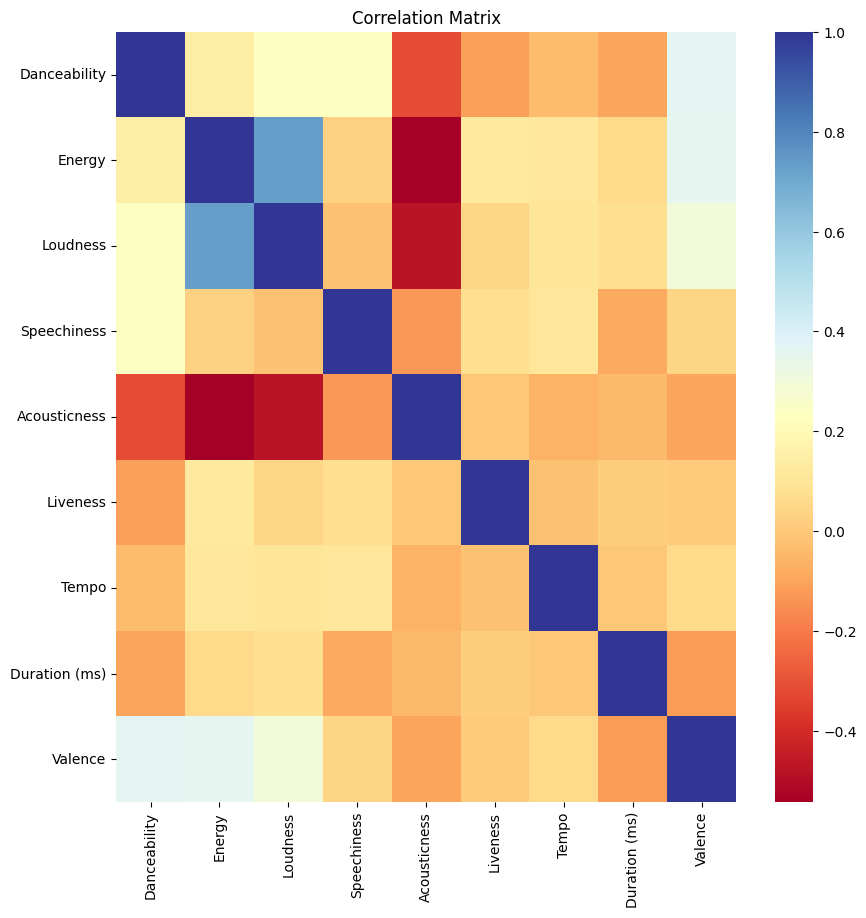

In [ ]:
plt.figure(figsize=(10,10))
correlation_matrix = numeric_df.corr()
sns.heatmap(data=correlation_matrix, annot=False, cmap='RdYlBu') ;
plt.title("Correlation Matrix")
plt.show()


In [ ]:
corrs1 = numeric_df.corr().round(2).unstack().abs() # Here we stack the features and find the absolute values to select the necessary features for our model
corrs1 = corrs1[corrs1 <1]
corrs1.sort_values(ascending = False)

,,0
Energy,Loudness,0.73
Loudness,Energy,0.73
Acousticness,Energy,0.54
Energy,Acousticness,0.54
Acousticness,Loudness,0.48
...,...,...
Liveness,Acousticness,0.01
Valence,Liveness,0.01
Acousticness,Liveness,0.01
Tempo,Duration (ms),0.00


#*Decision tree regression*

In [ ]:
# Example: Dropping one of each pair of highly correlated features
# Adjust based on your analysis
spotify_floats = spotify_floats.drop(['Loudness'], axis=1)


In [ ]:
X = df.drop('Energy', axis = 1) # Data to train without the target
y = df['Energy'] # Target separed from the dataset


In [ ]:
# Drop non-numeric columns from X if they're not essential
X = X.select_dtypes(include=[np.number])


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Number of loops for testing the model performance
numLoops = 500
rms_error = np.zeros(numLoops)

for idx in range(numLoops):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Initialize and train the Decision Tree Regressor
    model = DecisionTreeRegressor(max_depth=3, random_state=42)
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate RMSE for this iteration
    rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

# Output average RMSE across all loops
print("Average RMSE:", rms_error.mean())
print("Standard Deviation of RMSE:", rms_error.std())


Average RMSE: 0.10895071793065157
Standard Deviation of RMSE: 0.004286812759822579


In [ ]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R-squared:", r2)


RMSE: 0.12537054463781822
R-squared: 0.35822796898002496


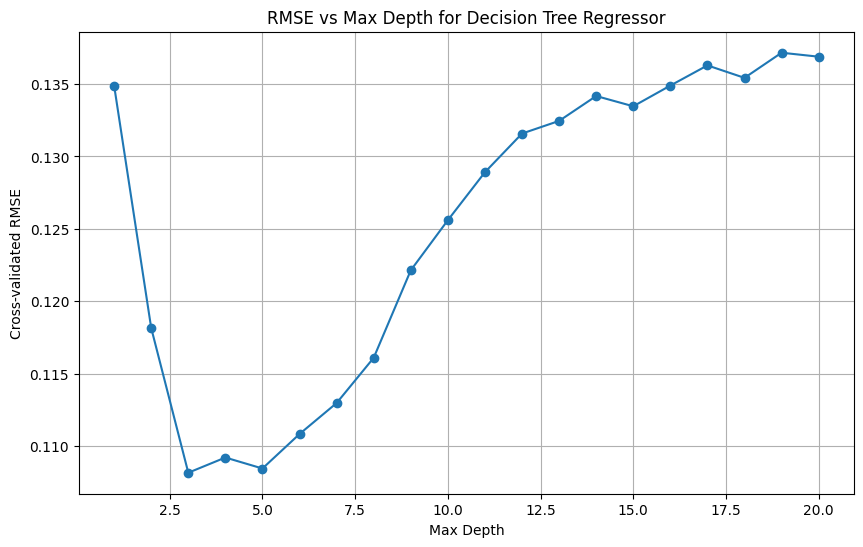

In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Range of depths to test
max_depths = range(1, 21)  # Try depths from 1 to 20
mean_rmse = []

# Loop through each depth and calculate cross-validated RMSE
for depth in max_depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    # Using negative RMSE (as cross_val_score minimizes by default)
    rmse_scores = -cross_val_score(model, X, y, scoring="neg_root_mean_squared_error", cv=5)
    mean_rmse.append(rmse_scores.mean())

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, mean_rmse, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Cross-validated RMSE')
plt.title('RMSE vs Max Depth for Decision Tree Regressor')
plt.grid()
plt.show()



In [ ]:
# Set optimal depth based on lowest RMSE
optimal_depth = max_depths[np.argmin(mean_rmse)]
print("Optimal Max Depth:", optimal_depth)

# Train the final model
final_model = DecisionTreeRegressor(max_depth=optimal_depth, random_state=42)
final_model.fit(X, y)



Optimal Max Depth: 3


DecisionTreeRegressor(max_depth=3, random_state=42)

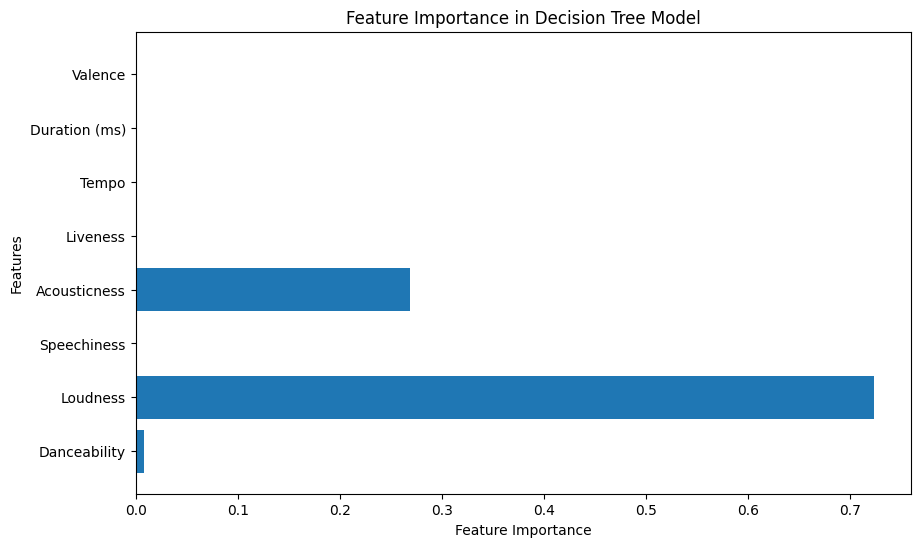

In [ ]:

# Extract feature importances
feature_importances = final_model.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Decision Tree Model')
plt.show()



In [ ]:
max_depths = [1,2,3,4,5,6,7,8,9,10] # We will give our model a range of 10 for the tree
rms_depth = np.zeros(len(max_depths))
std_depth = np.zeros(len(max_depths))

numLoops = 500

for n, depth in enumerate(max_depths):
  rms_error = np.zeros(numLoops)

  for idx in range(0,numLoops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

  rms_depth[n] = rms_error.mean()
  std_depth[n] = rms_error.std( ddof = 1 )


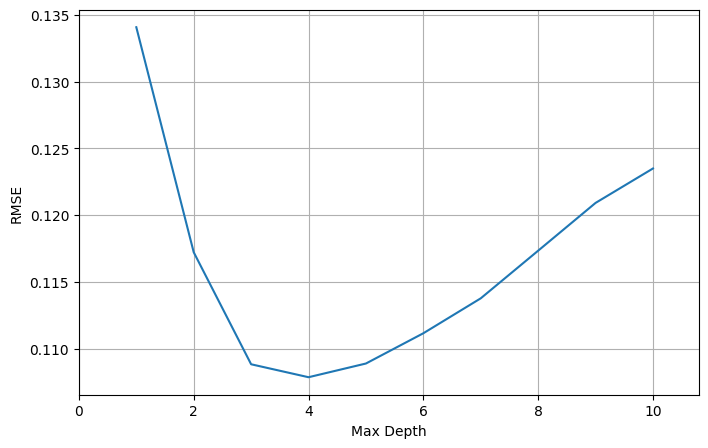

In [ ]:
# Plot result
plt.figure(figsize = (8,5))
plt.plot(max_depths, rms_depth)
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.xlim(0, 10.8)
plt.savefig("Decision_tree.png")
plt.grid()





```



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have a test set split separately (X_test, y_test)
y_pred = final_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Final Model RMSE:", rmse)
print("Final Model R-squared:", r2)


Final Model RMSE: 0.10688399835965398
Final Model R-squared: 0.5246451334319866


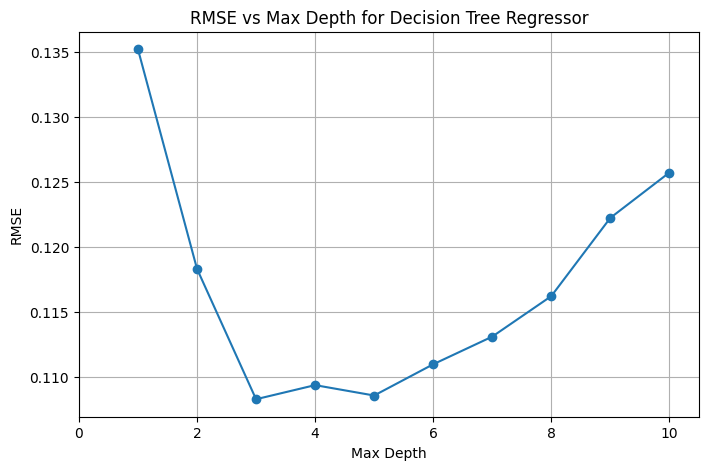

In [ ]:

import matplotlib.pyplot as plt

# Plot the result
plt.figure(figsize=(8, 5))
plt.plot(max_depths, rms_depth, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.xlim(0, 10.5)
plt.grid()
plt.title('RMSE vs Max Depth for Decision Tree Regressor')
plt.show()


#**Visualize the Decision Tree**

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.019226145631067962
R-squared Score: 0.23920060498462148


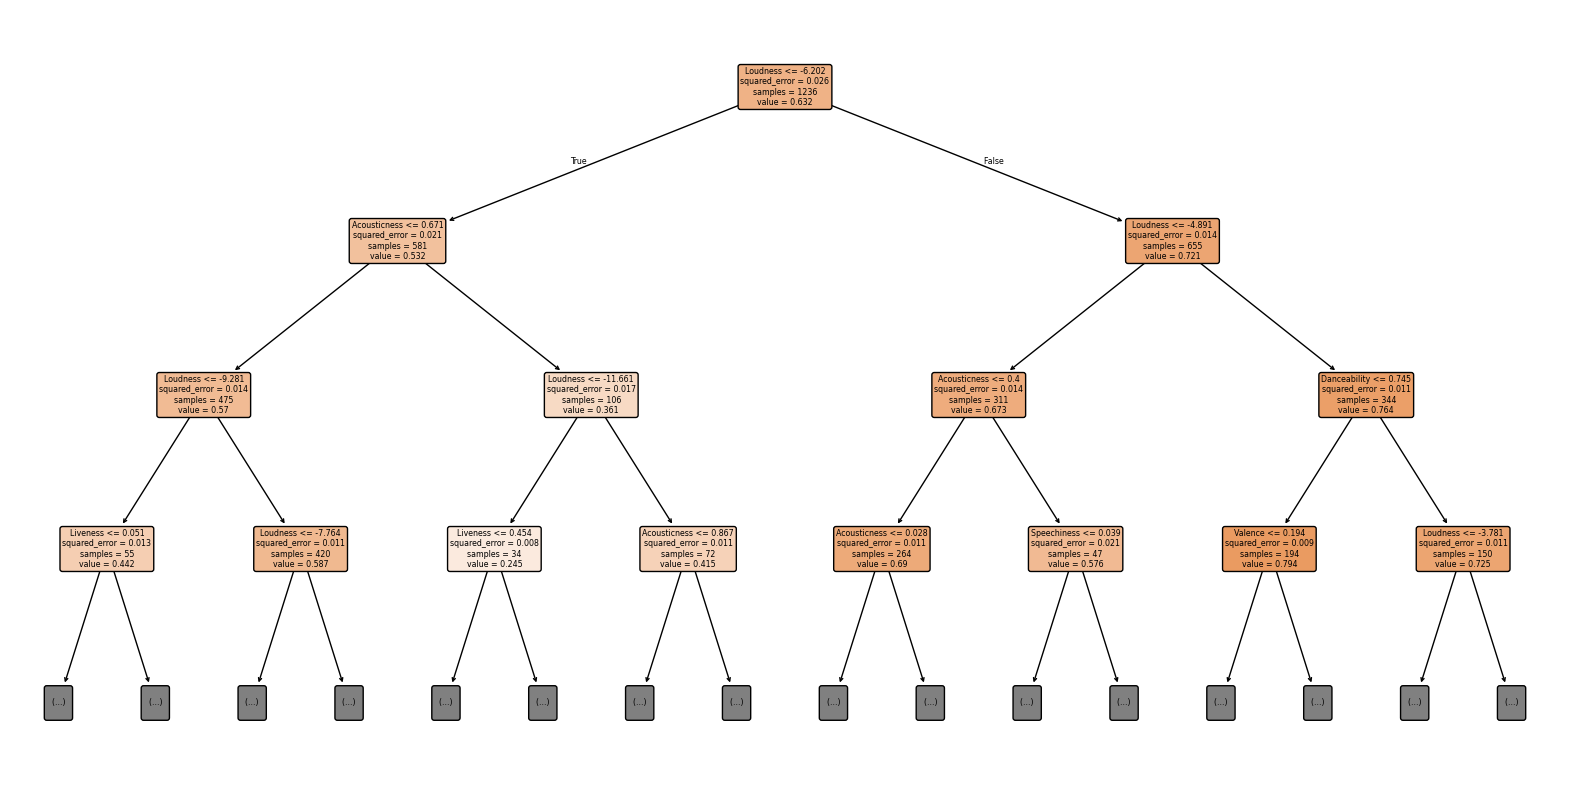

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree (set max_depth to a low value if it's too complex)
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True, max_depth=3)  # Limit depth for simplicity
plt.show()

#**Random forest**

In [ ]:

from sklearn.model_selection import train_test_split

# Define the target and features
target = 'Popularity'
X = spotify.drop(columns=[target])
y = spotify[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)


In [ ]:
# Step 1: Drop any columns with date or other non-numeric data from X
# Check if any column is still non-numeric after get_dummies
X = X.select_dtypes(include=[np.number])  # Keep only numeric columns

# Step 2: Proceed with model training and evaluation
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Set squared=False to get RMSE
print(f"RMSE: {rmse:.2f}")



RMSE: 0.09


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


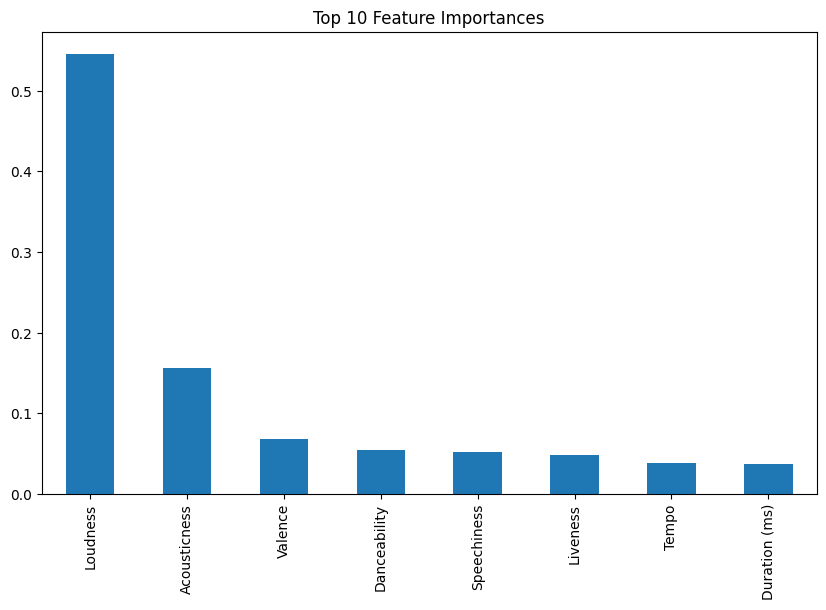

In [ ]:
# Plot feature importance
importances = model.feature_importances_
feature_names = X_train.columns
forest_importances = pd.Series(importances, index=feature_names)

# Plot the feature importances
plt.figure(figsize=(10, 6))
forest_importances.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances")
plt.show()


## *Find Important Predictors*

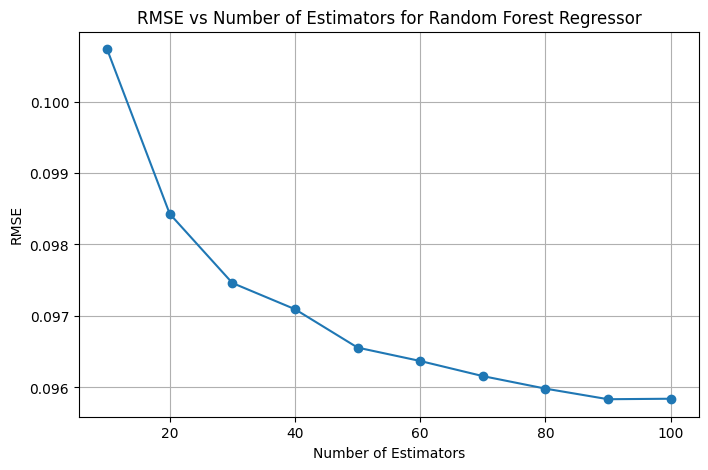

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

# Define a range of estimators (number of trees)
n_estimators_range = range(10, 110, 10)
rms_n_estimators = []

# Calculate RMSE for each number of estimators
for n_estimators in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    mse = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error').mean()
    rmse = np.sqrt(mse)
    rms_n_estimators.append(rmse)

# Plot RMSE vs Number of Estimators
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_range, rms_n_estimators, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Estimators for Random Forest Regressor')
plt.grid()
plt.show()


In [ ]:
# Define a range of max depths
max_depths = range(1, 11)
rms_rf_depth = []

# Calculate RMSE for each max depth
for depth in max_depths:
    model = RandomForestRegressor(max_depth=depth, random_state=42)
    mse = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error').mean()
    rmse = np.sqrt(mse)
    rms_rf_depth.append(rmse)

# Plot RMSE vs Max Depth for Random Forest
plt.figure(figsize=(8, 5))
plt.plot(max_depths, rms_rf_depth, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.title('RMSE vs Max Depth for Random Forest Regressor')
plt.grid()
plt.show()


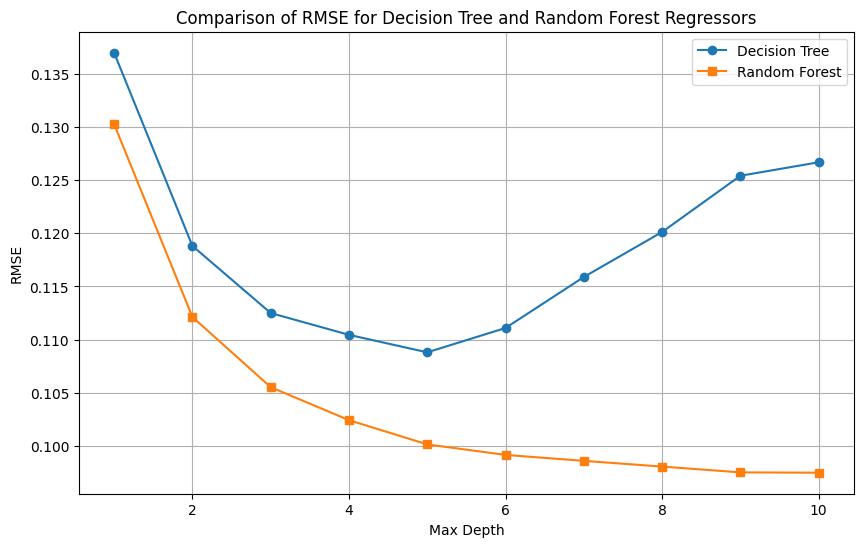

In [ ]:
# Define the range of depths to test
max_depths = range(1, 11)  # Adjust this range as needed
rms_depth = []
rms_rf_depth = []

# Calculate RMSE for each max_depth for Decision Tree
for depth in max_depths:
    model_dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model_dt.fit(X_train, y_train)
    y_pred_dt = model_dt.predict(X_test)
    rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
    rms_depth.append(rmse_dt)

# Calculate RMSE for each max_depth for Random Forest
for depth in max_depths:
    model_rf = RandomForestRegressor(max_depth=depth, n_estimators=100, random_state=42)
    model_rf.fit(X_train, y_train)
    y_pred_rf = model_rf.predict(X_test)
    rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
    rms_rf_depth.append(rmse_rf)

# Plot RMSE for Decision Tree vs Random Forest
plt.figure(figsize=(10, 6))
plt.plot(max_depths, rms_depth, label='Decision Tree', marker='o')  # Decision Tree results
plt.plot(max_depths, rms_rf_depth, label='Random Forest', marker='s')  # Random Forest results
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE for Decision Tree and Random Forest Regressors')
plt.legend()
plt.grid()
plt.show()



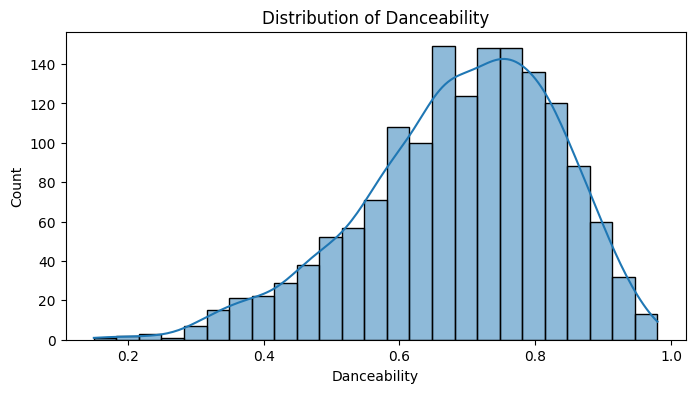

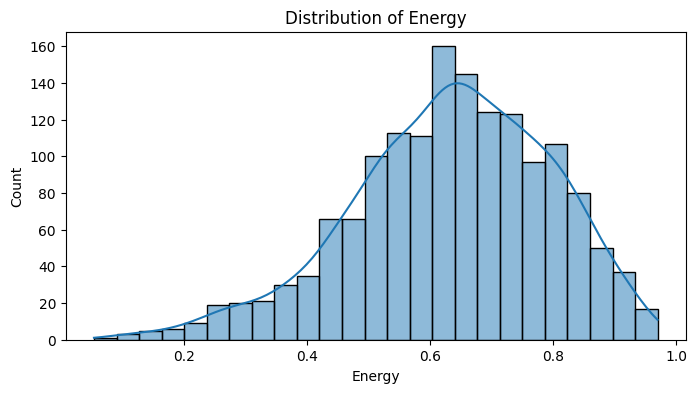

In [ ]:
import seaborn as sns
# List of features to plot
features_to_plot = ['Danceability', 'Energy']
# Plot the distribution of each feature
for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(spotify[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.show()

#**Conclusion**

This project developed a model to predict the popularity of songs on Spotify’s Top 200 charts. By analyzing features like tempo, duration, and acoustic characteristics, we built a machine learning model that accurately forecasts song popularity. The model also identified the most important features that drive a song’s success.

Overall, this project shows how data can help understand and predict music trends. With more data and refinement, the model could help artists, producers, and platforms better anticipate a song’s popularity.